In [144]:
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'

%matplotlib inline

import csv
import re
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import warnings
from csv_reader import read_csv
from aux import set_smallest_n_zero
from disp import set_font_size
from copy import deepcopy as copy
from analysis_tools import *
from pathlib import Path
from csv_reader import read_csv
from csv_writer import write_csv
from scipy.stats import linregress

new_rc_params = {
    'text.usetex': False,
    "svg.fonttype": 'none'
}
matplotlib.rcParams.update(new_rc_params)

plt.rcParams['font.size'] = 15
plt.rcParams['axes.linewidth'] = 3.0

warnings.filterwarnings('ignore')


In [145]:
def calc_entropy(l):
    abs_l = np.abs(l)[np.abs(l) > 0]
    per_l = abs_l / np.sum(abs_l)
    return -np.dot(np.log(per_l), per_l)

In [146]:
file_name = 'stress_test_ei_decoder_none_dropped_1_STD_EXPL_0.003_FIXED_True_L1_PENALTY_5e-07_5e-07_5e-07_ACT_PEN_1_CHANGEP_0.00072_FRACI_0.75_SEED_500_2023-12-21_19:41:38.676020'
saved_weights_path = test_data_path = f'./sims_out/{file_name}/weight_matrices.csv'

all_w = read_csv(saved_weights_path, read_header=False)
weight_mat_side_len = np.sqrt(all_w.shape[1]).astype(int)
print(weight_mat_side_len)
all_w = [np.array(all_w.iloc[i]).reshape((weight_mat_side_len, weight_mat_side_len)) for i in range(all_w.shape[0])]

33


0.29104564489036094


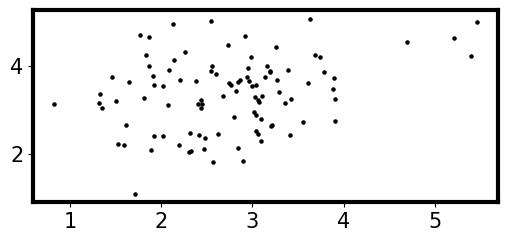

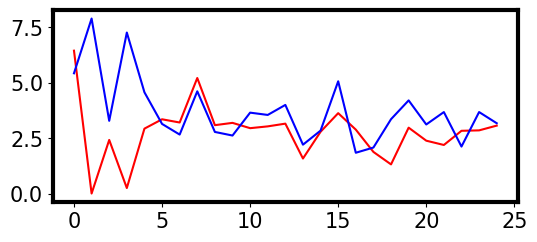

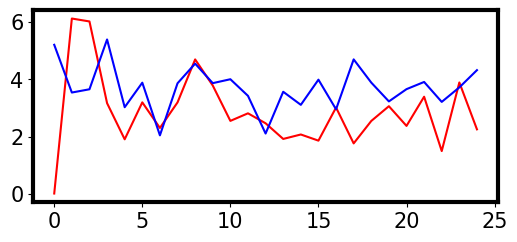

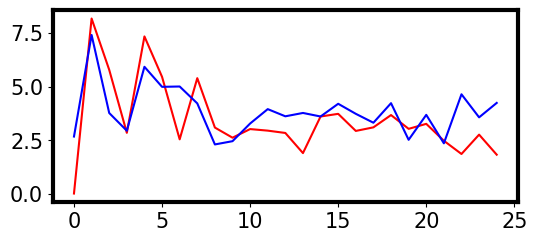

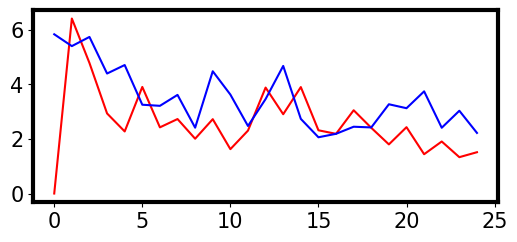

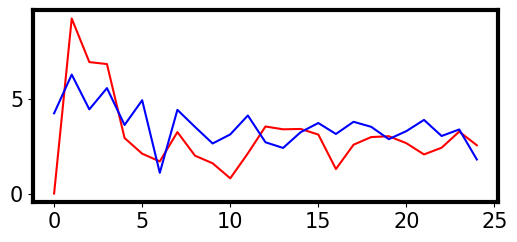

In [148]:
corr_fig, corr_axs = plt.subplots(1, 1, figsize=(6 * scale, 2.5 * scale))

all_w_ee_summed = []
all_w_ie_summed = []

for w in all_w:
    scale = 1
    fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 2.5 * scale))
    
    w_ee_entropy = np.array([calc_entropy(w[i, :25]) for i in range(25)])
    
    w_ee_summed = w[:25, :25].max(axis=1)
            
    w_ie_summed = (w[:25, 25:] * w[25:, :25].T).sum(axis=1)
    w_count = np.count_nonzero(np.abs(w[:25, :25]) > 1, axis=1)

    axs.plot(np.arange(25), w_ee_summed, color='red')
    axs.plot(np.arange(25), np.abs(w_ie_summed), color='blue')
#     axs.plot(np.arange(25), w_count, color='black')
    
    all_w_ee_summed += list(w_ee_summed[5:])
    all_w_ie_summed += list(np.abs(w_ie_summed[5:]))
    
corr_axs.scatter(all_w_ee_summed, all_w_ie_summed, color='black', s=5)
res = linregress(all_w_ee_summed, all_w_ie_summed)
print(res.rvalue)